In [81]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import expon, norm, binom

In [2]:
airplane_crashes = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv', sep=",")

In [3]:
airplane_crashes.head(5)

,﻿Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [39]:
print('Linhas: ', airplane_crashes.shape[0], '\nColunas: ', airplane_crashes.shape[1])

Linhas:  5268 
Colunas:  13


In [76]:
fatalities = airplane_crashes.Fatalities.dropna()
fatalities = fatalities[fatalities > 0]
fatalities.describe()

count    5198.000000
mean       20.292228
std        33.316562
min         1.000000
25%         3.000000
50%         9.000000
75%        23.000000
max       583.000000
Name: Fatalities, dtype: float64

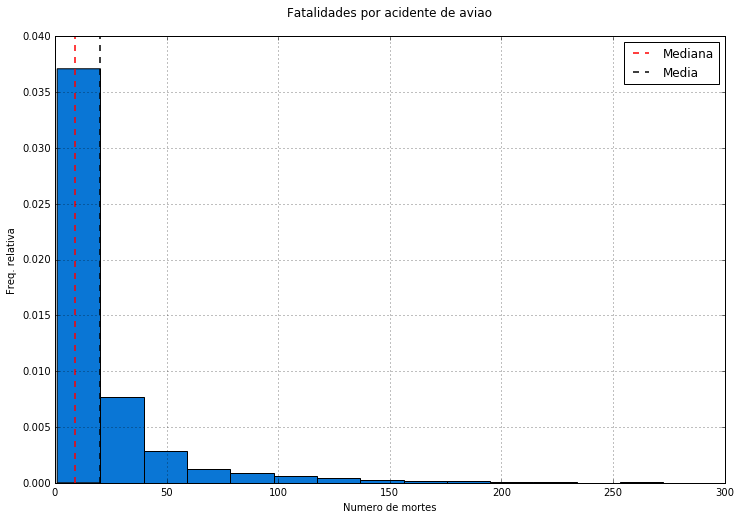

In [77]:
plt.figure(figsize=(12,8))
fatalities.hist(bins=30, normed=True, color='#0A76D5')
plt.axvline(fatalities.median(), lw=1.5, label='Mediana', color='r', ls='dashed')
plt.axvline(fatalities.mean(), lw=1.5, label='Media', color='black', ls='dashed')
plt.title('Fatalidades por acidente de aviao\n')
plt.ylabel('Freq. relativa')
plt.xlabel('Numero de mortes')
plt.legend(loc='best')
plt.axis([0,300,0,0.04])
plt.show()

O histograma acima pode ter dois tipos de distribuiçãoes, uma <b>exponencial</b> com a base do número entre 0 e 1, e uma outra <b>binomial</b>. Ambas as funções das distribuições são decrescentes.

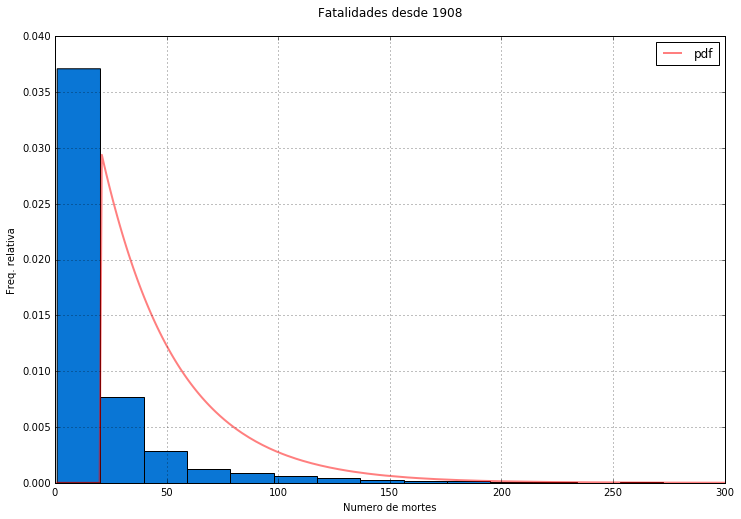

In [80]:
mu = fatalities.mean()
sigma = fatalities.std()
x = sorted(fatalities)

plt.figure(figsize=(12,8))
fatalities.hist(bins=30, normed=True, color='#0A76D5')
plt.plot(x, expon.pdf(x, loc=mu, scale=sigma), color='red', lw=2, alpha=0.5, label='pdf')
plt.title('Fatalidades desde 1908\n')
plt.ylabel('Freq. relativa')
plt.xlabel('Numero de mortes')
plt.legend(loc='best')
plt.axis([0,300,0,0.04])
plt.show()

In [85]:
plt.figure(figsize=(12,8))
fatalities.hist(bins=30, normed=True, color='#0A76D5')
plt.plot(x, binom.ppf(x, loc=mu, scale=sigma), color='red', lw=2, alpha=0.5, label='pdf')
plt.title('Fatalidades desde 1908\n')
plt.ylabel('Freq. relativa')
plt.xlabel('Numero de mortes')
plt.legend(loc='best')
plt.axis([0,300,0,0.04])
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-85-2c1cafee998f>, line 3)